In [1]:
import pandas as pd
import numpy as np             
from matplotlib import pyplot as plt  
import seaborn as sns  
import pickle 
import joblib

In [4]:
data = pd.read_csv("C:\\Users\\NAAH\\OneDrive\\Desktop\\ML\\diamonds.csv")
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [10]:
data.isnull().sum()


Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [12]:
data=data.drop(columns='Unnamed: 0')

In [13]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [14]:
 data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    8
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               9
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

In [15]:
data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,None,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [16]:
data=data.drop_duplicates()

In [18]:
data[data.duplicated()]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price


In [19]:
from sklearn.preprocessing import LabelEncoder

#This is to change feature variables to categorical values

In [24]:
lnc = LabelEncoder()
df= data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i]=lnc.fit_transform(data[i])
        joblib.dump(lnc,i+'.joblib',compress=9)

In [25]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int32  
 1   color                        215823 non-null  int32  
 2   clarity                      215823 non-null  int32  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int32  
 5   lab                          215823 non-null  int32  
 6   symmetry                     215823 non-null  int32  
 7   polish                       215823 non-null  int32  
 8   eye_clean                    215823 non-null  int32  
 9   culet_size                   215823 non-null  int32  
 10  culet_condition              215823 non-null  int32  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13 

Determing outliers

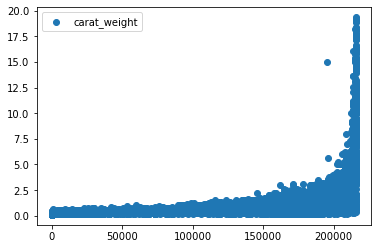

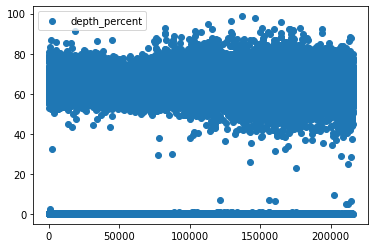

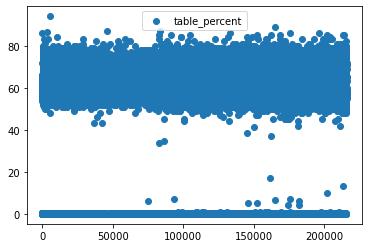

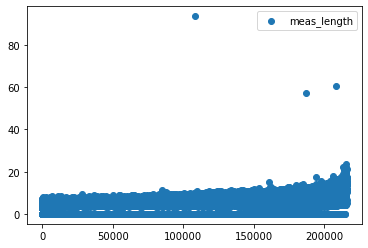

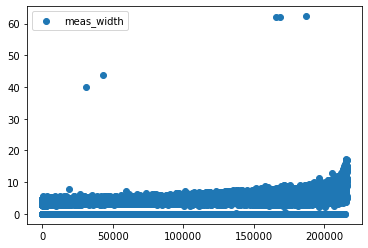

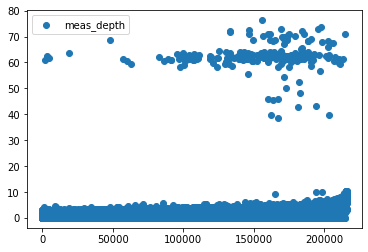

In [28]:
#plotting each feature variable

for i in df:   
    r = df[i].dtypes
    if r == 'float64':
        plt.scatter(range(len(df[i])), df[i], label=i)
        plt.legend()
        plt.show()

In [29]:
df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 30)]
df = df[(df.meas_depth < 30)]

In [30]:
#check to see if the following features have a 0 parameter or not
df[(df.meas_width == 0) | (df.meas_depth == 0) | (df.meas_length == 0) | (df.depth_percent == 0) | (df.table_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,2,12,10,8,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,5,12,10,8,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,2,12,10,8,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,2,12,10,8,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,8,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,2,11,1,8,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,2,12,10,8,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,8,9,408347


In [31]:
df2 = df.copy()
df2 = df2[(df2.meas_width !=0)]
df2 = df2[(df2.meas_depth !=0)]
df2 = df2[(df2.meas_length !=0)]
df2 = df2[(df2.depth_percent !=0)]
df2 = df2[(df2.table_percent !=0)]

print(df.shape)
print(df2.shape)

(215599, 25)
(210513, 25)


Feature selection and data splitting

<AxesSubplot:>

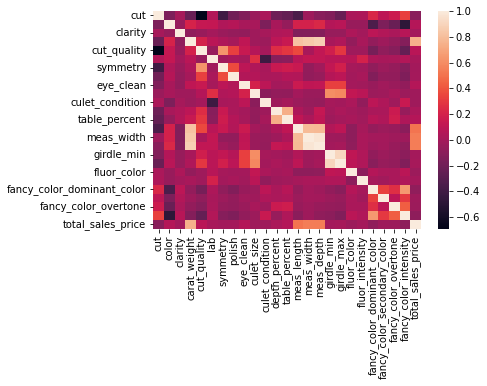

In [32]:
#quantitative analysis by feature correlation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()
#this is done normalize inputs

corr = df2.corr()
sns.heatmap(corr)

In [33]:
#defining features

features = []
for i in df2:
    if i != 'total_sales_price':
        features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [ ]:
x = df2[f] 